In [17]:
#librairie pandas
import pandas as pd
#scikit-learn
import sklearn
#librairie numpy
import numpy

# Importer le dataset
X = pandas.read_excel("exercice.xlsx",sheet_name=0,header=0,index_col=0)

In [18]:
#dimension
print(X.shape) # (18, 6)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
#affichage des données
print(X)


(18, 6)
                  CYL  PUISS  LONG  LARG  POIDS  V_MAX
Modele                                                
Alfasud TI       1350     79   393   161    870    165
Audi 100         1588     85   468   177   1110    160
Simca 1300       1294     68   424   168   1050    152
Citroen GS Club  1222     59   412   161    930    151
Fiat 132         1585     98   439   164   1105    165
Lancia Beta      1297     82   429   169   1080    160
Peugeot 504      1796     79   449   169   1160    154
Renault 16 TL    1565     55   424   163   1010    140
Renanult 30      2664    128   452   173   1320    180
Toyota Corrolla  1166     55   399   157    815    140
Alfetta-1.66     1570    109   428   162   1060    175
Princess-1800    1798     82   445   172   1160    158
Datsun-200L      1998    115   469   169   1370    160
Taunus-2000      1993     98   438   170   1080    167
Rancho           1442     80   431   166   1129    144
Mazda-9225       1769     83   440   165   1095    165
Op

In [19]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation des donneés => centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

C:\Users\aleleannec\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aleleannec\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
#moyenne
print(numpy.mean(Z,axis=0))


[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]


In [21]:
#écart-type
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1.]


In [22]:
#import pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [23]:
#affichage des paramètres
print(acp)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)


In [24]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 6


6


In [69]:
#variance expliquée
print(acp.explained_variance_)


[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


In [70]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)


[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [71]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)


[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [72]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

# la première composante totalise à elle seule 74% de l'information disponible ==> existence d'un effet taille

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


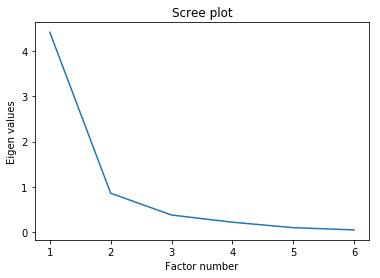

In [73]:
import matplotlib.pyplot as plt

#scree plot => Valeurs Propres
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


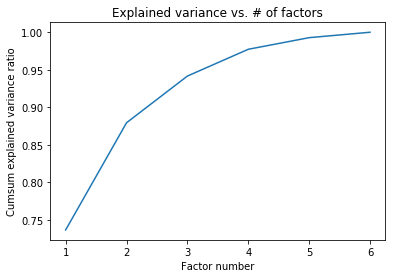

In [74]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


In [75]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]


In [76]:
#test des bâtons brisés
print(pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


   Val.Propre    Seuils
0    4.420858  2.450000
1    0.856062  1.450000
2    0.373066  0.950000
3    0.213922  0.616667
4    0.092801  0.366667
5    0.043290  0.166667


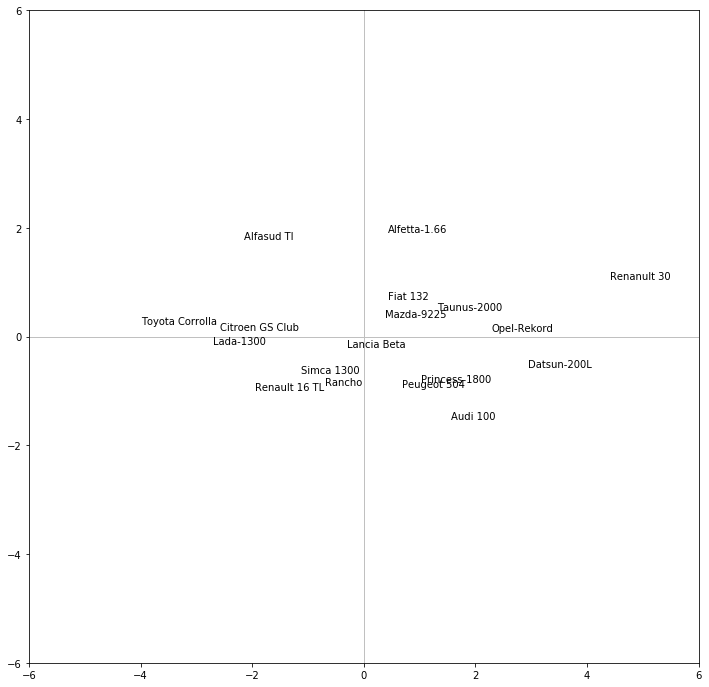

In [77]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


In [78]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pandas.DataFrame({'ID':X.index,'d_i':di}))


                 ID        d_i
0        Alfasud TI   8.225176
1          Audi 100   6.673755
2        Simca 1300   2.159327
3   Citroen GS Club   6.780145
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
6       Peugeot 504   1.512793
7     Renault 16 TL   5.636826
8       Renanult 30  21.789657
9   Toyota Corrolla  16.290143
10     Alfetta-1.66   4.456770
11    Princess-1800   1.952513
12      Datsun-200L  11.112624
13      Taunus-2000   2.452986
14           Rancho   1.963373
15       Mazda-9225   0.684521
16      Opel-Rekord   6.083119
17        Lada-1300   7.922198


In [79]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pandas.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                 id    COS2_1    COS2_2
0        Alfasud TI  0.556218  0.387670
1          Audi 100  0.365334  0.349406
2        Simca 1300  0.580284  0.210694
3   Citroen GS Club  0.976992  0.001879
4          Fiat 132  0.156579  0.413826
5       Lancia Beta  0.081555  0.033900
6       Peugeot 504  0.309202  0.575488
7     Renault 16 TL  0.673539  0.170535
8       Renanult 30  0.892431  0.051920
9   Toyota Corrolla  0.975219  0.003426
10     Alfetta-1.66  0.042978  0.820652
11    Princess-1800  0.530947  0.362855
12      Datsun-200L  0.778390  0.028137
13      Taunus-2000  0.704819  0.096496
14           Rancho  0.243273  0.410469
15       Mazda-9225  0.217336  0.185337
16      Opel-Rekord  0.861900  0.001790
17        Lada-1300  0.926052  0.002607


In [39]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [80]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pandas.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                 id     CTR_1     CTR_2
0        Alfasud TI  0.057493  0.206933
1          Audi 100  0.030640  0.151329
2        Simca 1300  0.015746  0.029525
3   Citroen GS Club  0.083244  0.000827
4          Fiat 132  0.002300  0.031398
5       Lancia Beta  0.001163  0.002497
6       Peugeot 504  0.005878  0.056499
7     Renault 16 TL  0.047711  0.062384
8       Renanult 30  0.244369  0.073419
9   Toyota Corrolla  0.199640  0.003622
10     Alfetta-1.66  0.002407  0.237357
11    Princess-1800  0.013028  0.045978
12      Datsun-200L  0.108701  0.020292
13      Taunus-2000  0.021727  0.015361
14           Rancho  0.006002  0.052300
15       Mazda-9225  0.001870  0.008233
16      Opel-Rekord  0.065888  0.000707
17        Lada-1300  0.092194  0.001340


In [42]:
#vérifions la théorie
print(numpy.sum(ctr,axis=0))


[1. 1. 1. 1. 1. 1.]


In [43]:
#le champ components_ de l'objet ACP
print(acp.components_)


[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


In [67]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)

#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


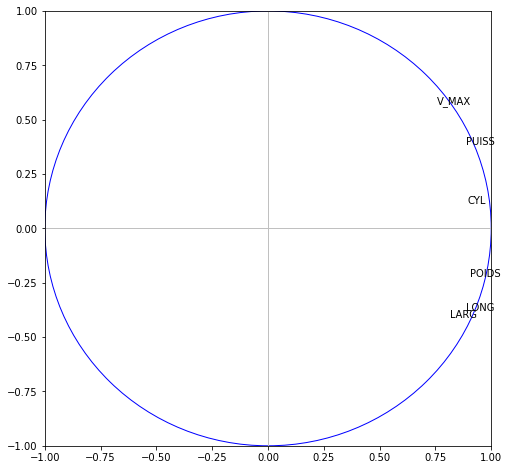

In [81]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

# effet taille

In [82]:
#cosinus carré des variables
cos2var = corvar**2
print(pandas.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

      id    COS2_1    COS2_2
0    CYL  0.798277  0.013203
1  PUISS  0.786517  0.147986
2   LONG  0.785270  0.145183
3   LARG  0.661841  0.170351
4  POIDS  0.819364  0.050415
5  V_MAX  0.569588  0.328925


In [66]:
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pandas.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

      id     CTR_1     CTR_2
0    CYL  0.040845  0.018017
1  PUISS  0.040243  0.201934
2   LONG  0.040180  0.198109
3   LARG  0.033864  0.232452
4  POIDS  0.041924  0.068794
5  V_MAX  0.029144  0.448834


In [51]:
#chargement des individus supplémentaires
indSupp = pandas.read_excel("exercice.xlsx",sheet_name=1,header=0,index_col=0)
print(indSupp)


                CYL  PUISS  LONG  LARG  POIDS  V_MAX
Modele                                              
Peugeot 604    2664    136   472   177   1410    180
Peugeot 304 S  1288     74   414   157    915    160


In [52]:
#centrage-réduction avec les paramètres des individus actifs
ZIndSupp = sc.transform(indSupp)
print(ZIndSupp)


[[ 2.84080623  2.59511201  1.79199036  2.0010414   2.48812166  1.84112668]
 [-0.94571238 -0.53585556 -0.90763148 -1.87194195 -1.23091273  0.14597168]]


C:\Users\aleleannec\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [83]:
#projection dans l'espace factoriel
coordSupp = acp.transform(ZIndSupp)
print(coordSupp)


[[ 5.56329226  0.33860928 -0.46428878  0.40214608 -0.38981076 -0.08102064]
 [-2.21224139  1.25777905 -0.09304388 -0.35370189  0.648528    0.12473042]]


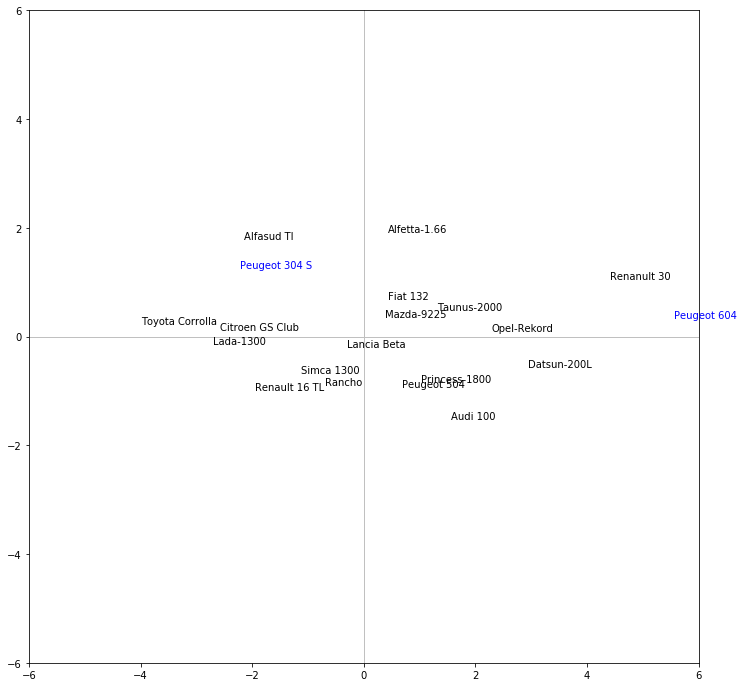

In [84]:
#positionnement des individus supplémentaires dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
#étiquette des points actifs
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))

#étiquette des points supplémentaires (illustratifs) en bleu ‘b’
for i in range(coordSupp.shape[0]):
    plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,1]),color='b')

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [85]:
#importation des variables supplémentaires
varSupp = pandas.read_excel("exercice.xlsx",sheet_name=2,header=0,index_col=0)
print(varSupp)

                  Prix  R_Poids_Puis Finition
Modele                                       
Alfa             30570        11.013      2_B
Audi100          39990        13.059     3_TB
Simca1300        29600        15.441      1_M
Citroen GS Club  28250        15.763      1_M
Fiat 132         34900        11.276      2_B
Lancia Beta      35480        13.171     3_TB
Peugeot 504      32300        14.684      2_B
Renault 16 TL    32000        18.364      2_B
Renault 30       47700        10.313     3_TB
Tooyta Corolla   26540        14.818      1_M
Alfetta-1.66     42395         9.725     3_TB
Princess-1800    33990        14.146      2_B
Datsun-200L      43980        11.913     3_TB
Taunus-2000      35010        11.020      2_B
Rancho           39450        14.113     3_TB
Mazda-9295       27900        13.193      1_M
Opel-Rekord      32700        11.200      2_B
Lada-1300        22100        14.044      1_M


In [86]:
#variables supplémentaires quanti
vsQuanti = varSupp.iloc[:,:2].values
print(vsQuanti)


[[3.0570e+04 1.1013e+01]
 [3.9990e+04 1.3059e+01]
 [2.9600e+04 1.5441e+01]
 [2.8250e+04 1.5763e+01]
 [3.4900e+04 1.1276e+01]
 [3.5480e+04 1.3171e+01]
 [3.2300e+04 1.4684e+01]
 [3.2000e+04 1.8364e+01]
 [4.7700e+04 1.0313e+01]
 [2.6540e+04 1.4818e+01]
 [4.2395e+04 9.7250e+00]
 [3.3990e+04 1.4146e+01]
 [4.3980e+04 1.1913e+01]
 [3.5010e+04 1.1020e+01]
 [3.9450e+04 1.4113e+01]
 [2.7900e+04 1.3193e+01]
 [3.2700e+04 1.1200e+01]
 [2.2100e+04 1.4044e+01]]


In [87]:
#corrélation avec les axes factoriels
corSupp = numpy.zeros((vsQuanti.shape[1],p))
for k in range(p):
    for j in range(vsQuanti.shape[1]):
        corSupp[j,k] = numpy.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]

#affichage des corrélations avec les axes
print(corSupp)


[[ 0.77247524  0.08670844 -0.13389277 -0.22582891 -0.15944978 -0.10254878]
 [-0.58903133 -0.67252871 -0.15019774  0.21363857  0.10163937  0.29003495]]


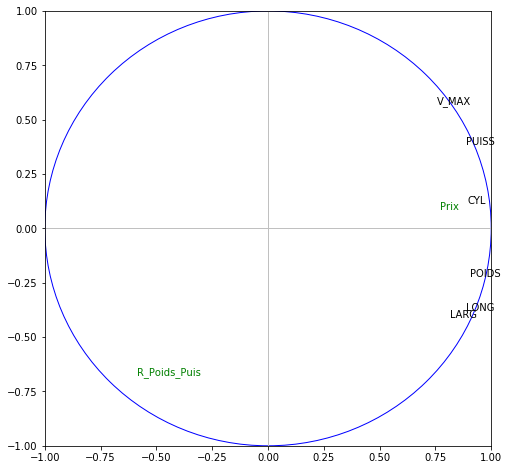

In [88]:
#cercle des corrélations avec les var. supp
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#variables illustratives
for j in range(vsQuanti.shape[1]):
    plt.annotate(varSupp.columns[j],(corSupp[j,0],corSupp[j,1]),color='g')

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


In [89]:
#traitement de var. quali supplémentaire
vsQuali = varSupp.iloc[:,2]
print(vsQuali)


Modele
Alfa                2_B
Audi100            3_TB
Simca1300           1_M
Citroen GS Club     1_M
Fiat 132            2_B
Lancia Beta        3_TB
Peugeot 504         2_B
Renault 16 TL       2_B
Renault 30         3_TB
Tooyta Corolla      1_M
Alfetta-1.66       3_TB
Princess-1800       2_B
Datsun-200L        3_TB
Taunus-2000         2_B
Rancho             3_TB
Mazda-9295          1_M
Opel-Rekord         2_B
Lada-1300           1_M
Name: Finition, dtype: object


In [90]:
#modalités de la variable qualitative
modalites = numpy.unique(vsQuali)
print(modalites)


['1_M' '2_B' '3_TB']


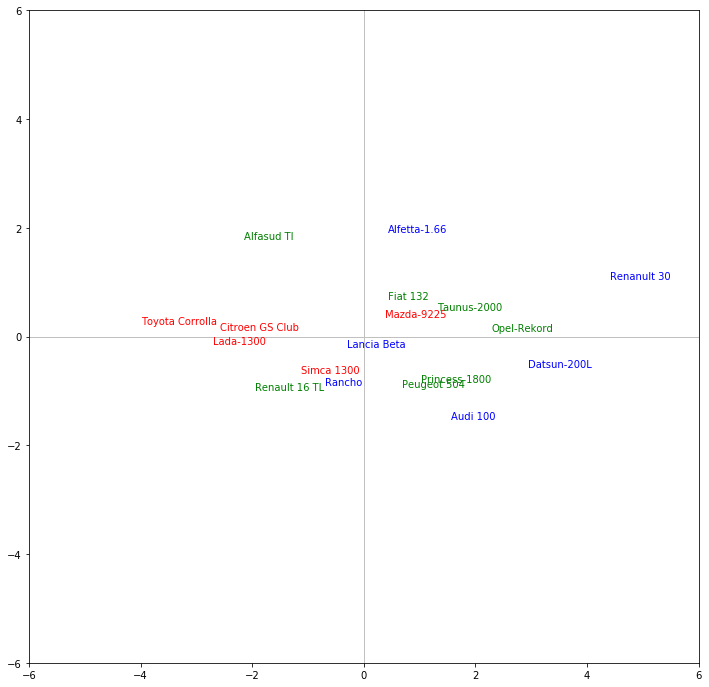

In [91]:
#liste des couleurs
couleurs = ['r','g','b']
#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
 #numéro des individus concernés
 numero = numpy.where(vsQuali == modalites[c])
 #les passer en revue pour affichage
 for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


In [92]:
#structure intermédiaire
df = pandas.DataFrame({'Finition':vsQuali,'F1':coord[:,0],'F2':coord[:,1]})
#puis calculer les moyennes conditionnelles
print(df.pivot_table(index='Finition',values=['F1','F2'],aggfunc=pandas.Series.mean))

                F1        F2
Finition                    
1_M      -2.000355 -0.022579
2_B       0.235313  0.045271
3_TB      1.392430 -0.034001
